### 과제
- 데이터셋: iris.csv => 100개 데이터셋 : 2진분류
- KNN 알고리즘 사용
- 품종 분류
- 학습용, 테스트용 데이터셋 분리
- 테스트용 데이터셋으로 검증까지

- 컬럼 4개 중 피처는 선택

[1] iris 데이터 준비

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
DATA_FILE = 'iris.csv'

In [6]:
irisDF = pd.read_csv(DATA_FILE)
irisDF.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


- features -> sepal.length, sepal.width

In [7]:
sepalDF=irisDF.iloc[:100,[0,1,4]]
sepalDF

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
95,5.7,3.0,Versicolor
96,5.7,2.9,Versicolor
97,6.2,2.9,Versicolor
98,5.1,2.5,Versicolor


In [8]:
sepalDF['variety'].unique()

array(['Setosa', 'Versicolor'], dtype=object)

In [9]:
# varitey 컬럼을 수치화 => setosa: 0, Versicolor: 1, Virginica:2
names = sepalDF['variety'].unique().tolist()
sepalDF['code'] = sepalDF.variety.replace({name:idx for idx, name in enumerate(names)})

In [10]:
sepalDF.head()

,sepal.length,sepal.width,variety,code
0,5.1,3.5,Setosa,0
1,4.9,3.0,Setosa,0
2,4.7,3.2,Setosa,0
3,4.6,3.1,Setosa,0
4,5.0,3.6,Setosa,0


[2] iris 피처와 타겟 분리

In [11]:
features = sepalDF[['sepal.length', 'sepal.width']]
target = sepalDF['code']

print(f'feature => {features.shape}, {features.ndim}D')
print(f'feature => {target.shape}, {target.ndim}D')


feature => (100, 2), 2D
feature => (100,), 1D


[3] 데이터셋 준비 => 학습용, 테스트용

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# train:test = 80:20 ==> test_size=0.2 또는 train_size=0.8
# stratify 매개변수 : *분류*일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    stratify=target,
                                                    random_state=10)

In [14]:
print(f'x_train: {x_train.shape}, {x_train.ndim}D')
print(f'y_train: {y_train.shape}, {y_train.ndim}D')

print(f'x_test: {x_test.shape}, {x_test.ndim}D')
print(f'y_test: {y_test.shape}, {y_test.ndim}D')

x_train: (80, 2), 2D
y_train: (80,), 1D
x_test: (20, 2), 2D
y_test: (20,), 1D


In [15]:
y_train.value_counts()

code
1    40
0    40
Name: count, dtype: int64

In [16]:
y_train.value_counts()[0]/y_train.shape[0], y_train.value_counts()[1]/y_train.shape[0]

(0.5, 0.5)

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# 인스턴스 생성
iris_model = KNeighborsClassifier()

In [19]:
# 학습 진행 ==> 학습용 데이터셋
iris_model.fit(x_train, y_train)

KNeighborsClassifier()

In [20]:
# 학습 후 모델 파라미터
iris_model.classes_, iris_model.feature_names_in_, iris_model.n_samples_fit_

(array([0, 1], dtype=int64),
 array(['sepal.length', 'sepal.width'], dtype=object),
 80)

[5] 모델 성능평가 ==> score() 메서드 + 테스트 데이터셋

In [21]:
iris_model.score(x_test,y_test)

1.0

[6] 예측하기 ==> 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의사항: 입력데이터 ==> 2D

In [22]:
new_iris = pd.DataFrame([[5.5, 3.3]], columns=iris_model.feature_names_in_)
new_iris

,sepal.length,sepal.width
0,5.5,3.3


In [23]:
iris_model.predict(new_iris)

array([0], dtype=int64)

In [24]:
### 최근접한 k개 데이터 찾기
distance, index = iris_model.kneighbors(new_iris)

In [25]:
distance

array([[0.14142136, 0.14142136, 0.31622777, 0.31622777, 0.36055513]])

In [26]:
index

array([[15,  2, 27,  5, 76]], dtype=int64)

In [27]:
sepalDF.loc[index.reshape(-1).tolist()]

,sepal.length,sepal.width,variety,code
15,5.7,4.4,Setosa,0
2,4.7,3.2,Setosa,0
27,5.2,3.5,Setosa,0
5,5.4,3.9,Setosa,0
76,6.8,2.8,Versicolor,1


In [28]:
new_iris['sepal.length'], new_iris['sepal.width']

(0    5.5
 Name: sepal.length, dtype: float64,
 0    3.3
 Name: sepal.width, dtype: float64)

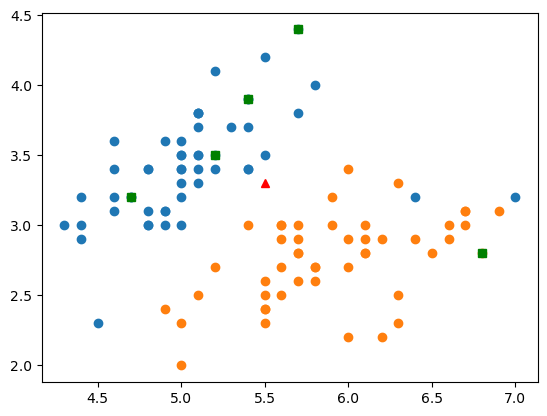

In [29]:
### 시각화

plt.scatter(sepalDF.loc[:51, 'sepal.length'], sepalDF.loc[:51, 'sepal.width'])
plt.scatter(sepalDF.loc[52:, 'sepal.length'], sepalDF.loc[52:, 'sepal.width'])
plt.plot(new_iris['sepal.length'], new_iris['sepal.width'], 'r^')
plt.plot(sepalDF.loc[index.reshape(-1).tolist()]['sepal.length'], sepalDF.loc[index.reshape(-1).tolist()]['sepal.width'], 'gs')
plt.show()

[추가] 피처 스케일링

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [32]:
mmScaler.fit(x_train)

MinMaxScaler()

In [33]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_

(array([-1.59259259, -0.90909091]),
 array([4.3, 2. ]),
 array([0.37037037, 0.45454545]),
 array([7. , 4.2]))

In [34]:
x_train.min(), x_train.max()

(sepal.length    4.3
 sepal.width     2.0
 dtype: float64,
 sepal.length    7.0
 sepal.width     4.2
 dtype: float64)

In [35]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
x_train_scaled=mmScaler.transform(x_train)
x_train_scaled.shape

(80, 2)

In [36]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
x_test_scaled=mmScaler.transform(x_test)
x_test_scaled.shape, x_test_scaled.min(), x_test_scaled.max()

((20, 2), 0.037037037037037424, 1.0909090909090908)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# 인스턴스 생성
scaled_iris_model = KNeighborsClassifier()

In [59]:
scaled_iris_model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [60]:
# 학습 후 모델 파라미터
scaled_iris_model.classes_, scaled_iris_model.n_samples_fit_

# model.feature_names_in_ ndarray일 경우 X

(array([0, 1], dtype=int64), 80)

In [61]:
scaled_iris_model.score(x_test_scaled, y_test)

1.0

In [62]:
mmScaler.data_range_, mmScaler.transform(new_iris)

(array([2.7, 2.2]), array([[0.44444444, 0.59090909]]))

In [63]:
new_iris_scaled= mmScaler.transform(new_iris)
new_iris_scaled

array([[0.44444444, 0.59090909]])

In [64]:
scaled_iris_model.predict(new_iris)

c:\Users\KDP-50\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([1], dtype=int64)

In [68]:
### 최근접한 k개 데이터 찾기
scaled_distance, scaled_index = scaled_iris_model.kneighbors(new_iris_scaled)

In [70]:
scaled_distance

array([[0.05863325, 0.05863325, 0.14130387, 0.14130387, 0.14356233]])

In [71]:
scaled_index

array([[15,  2, 27,  5, 76]], dtype=int64)

In [72]:
neighbors = scaled_index.reshape(-1).tolist()

In [73]:
k_length=x_train_scaled[neighbors][:,0]
k_width=x_train_scaled[neighbors][:,1]

In [75]:
x_train_scaled[:,0], x_train_scaled[:,1]

(array([0.33333333, 0.2962963 , 0.40740741, 0.88888889, 0.62962963,
        0.48148148, 0.2962963 , 0.18518519, 0.2962963 , 0.51851852,
        0.18518519, 0.11111111, 0.48148148, 0.74074074, 0.7037037 ,
        0.40740741, 0.03703704, 0.62962963, 0.22222222, 0.48148148,
        0.85185185, 0.2962963 , 0.11111111, 0.2962963 , 0.62962963,
        0.77777778, 0.62962963, 0.48148148, 0.40740741, 0.7037037 ,
        0.66666667, 0.25925926, 0.59259259, 0.2962963 , 0.03703704,
        0.51851852, 0.25925926, 0.18518519, 0.        , 0.66666667,
        0.11111111, 0.96296296, 0.74074074, 0.25925926, 0.59259259,
        0.44444444, 0.44444444, 0.18518519, 0.51851852, 0.40740741,
        0.55555556, 0.44444444, 0.14814815, 0.44444444, 0.2962963 ,
        0.88888889, 0.55555556, 0.66666667, 0.33333333, 0.74074074,
        0.51851852, 0.11111111, 0.18518519, 1.        , 0.85185185,
        0.22222222, 0.37037037, 0.88888889, 0.25925926, 0.22222222,
        0.25925926, 0.44444444, 0.55555556, 0.25

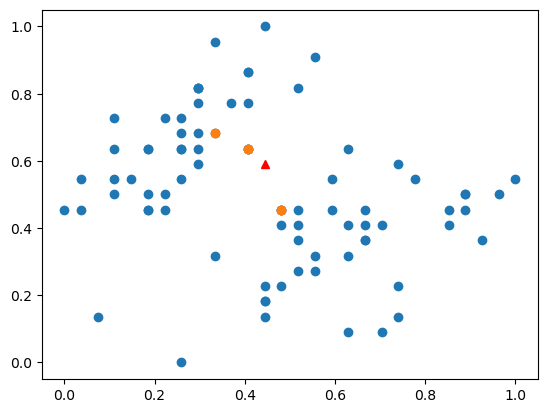

In [76]:
### 시각화

plt.scatter(x_train_scaled[:,0], x_train_scaled[:,1]) # 스케일링된 x_train
plt.scatter(k_length, k_width)
plt.plot(new_iris_scaled[0,0], new_iris_scaled[0,1], 'r^')
plt.show()

- features -> petal.length, petal.width

In [39]:
petalDF = irisDF.iloc[:100,2:5]
petalDF

,petal.length,petal.width,variety
0,1.4,0.2,Setosa
1,1.4,0.2,Setosa
2,1.3,0.2,Setosa
3,1.5,0.2,Setosa
4,1.4,0.2,Setosa
...,...,...,...
95,4.2,1.2,Versicolor
96,4.2,1.3,Versicolor
97,4.3,1.3,Versicolor
98,3.0,1.1,Versicolor


In [40]:
petalDF['variety'].unique()

array(['Setosa', 'Versicolor'], dtype=object)

In [41]:
# varitey 컬럼을 수치화 => setosa: 0, Versicolor: 1, Virginica:2
petal_names = petalDF['variety'].unique().tolist()
petalDF['code2'] = petalDF.variety.replace({name:idx for idx, name in enumerate(petal_names)})

In [42]:
features2 = petalDF[['petal.length', 'petal.width']]
target2 = petalDF['code2']

print(f'feature => {features.shape}, {features.ndim}D')
print(f'feature => {target.shape}, {target.ndim}D')

feature => (100, 2), 2D
feature => (100,), 1D


In [43]:
# train:test = 80:20 ==> test_size=0.2 또는 train_size=0.8
# stratify 매개변수 : *분류*일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
x_train2, x_test2, y_train2, y_test2 = train_test_split(features2,
                                                    target2,
                                                    test_size=0.2,
                                                    stratify=target2,
                                                    random_state=10)

In [44]:
print(f'x_train2: {x_train2.shape}, {x_train2.ndim}D')
print(f'y_train2: {y_train2.shape}, {y_train2.ndim}D')

print(f'x_test2: {x_test2.shape}, {x_test2.ndim}D')
print(f'y_test2: {y_test2.shape}, {y_test2.ndim}D')

x_train2: (80, 2), 2D
y_train2: (80,), 1D
x_test2: (20, 2), 2D
y_test2: (20,), 1D


In [45]:
y_train2.value_counts()

code2
1    40
0    40
Name: count, dtype: int64

In [46]:
y_train2.value_counts()[0]/y_train2.shape[0], y_train2.value_counts()[1]/y_train2.shape[0]

(0.5, 0.5)

In [47]:
iris_model2 = KNeighborsClassifier()

In [48]:
# 학습 진행 ==> 학습용 데이터셋
iris_model2.fit(x_train2, y_train2)

KNeighborsClassifier()

In [49]:
# 학습 후 모델 파라미터
iris_model2.classes_, iris_model2.feature_names_in_, iris_model2.n_samples_fit_

(array([0, 1], dtype=int64),
 array(['petal.length', 'petal.width'], dtype=object),
 80)

In [50]:
iris_model2.score(x_test2,y_test2)

1.0

In [51]:
new_iris2 = pd.DataFrame([[3.0, 1.3]], columns=iris_model2.feature_names_in_)
new_iris2

,petal.length,petal.width
0,3.0,1.3


In [52]:
iris_model2.predict(new_iris2)

array([1], dtype=int64)

In [53]:
### 최근접한 k개 데이터 찾기
distance2, index2 = iris_model2.kneighbors(new_iris2)

In [54]:
distance2

array([[0.58309519, 0.58309519, 0.6       , 0.76157731, 0.82462113]])

In [55]:
index2

array([[48, 31, 19, 53, 45]], dtype=int64)

In [56]:
petalDF.loc[index2.reshape(-1).tolist()]

,petal.length,petal.width,variety,code2
48,1.5,0.2,Setosa,0
31,1.5,0.4,Setosa,0
19,1.5,0.3,Setosa,0
53,4.0,1.3,Versicolor,1
45,1.4,0.3,Setosa,0


In [57]:
new_iris2['petal.length'], new_iris2['petal.width']

(0    3.0
 Name: petal.length, dtype: float64,
 0    1.3
 Name: petal.width, dtype: float64)

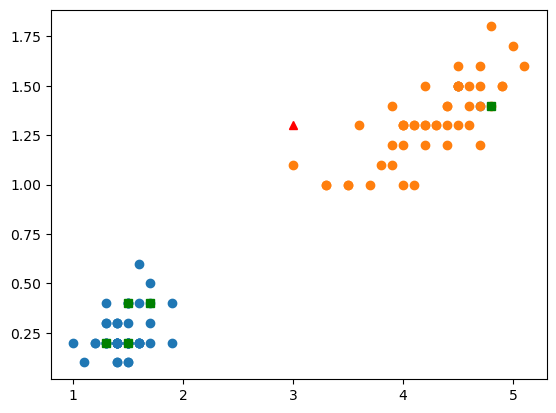

In [58]:
### 시각화

plt.scatter(petalDF.loc[:51, 'petal.length'], petalDF.loc[:51, 'petal.width'])
plt.scatter(petalDF.loc[52:, 'petal.length'], petalDF.loc[52:, 'petal.width'])
plt.plot(new_iris2['petal.length'], new_iris2['petal.width'], 'r^')
plt.plot(petalDF.loc[index.reshape(-1).tolist()]['petal.length'], petalDF.loc[index.reshape(-1).tolist()]['petal.width'], 'gs')
plt.show()

[추가] 피처 스케일링

In [77]:
# 스케일러 인스턴스 생성
mmScaler2 = MinMaxScaler()

In [78]:
mmScaler2.fit(x_train2)

MinMaxScaler()

In [79]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler2.min_, mmScaler2.data_min_, mmScaler2.scale_, mmScaler2.data_max_
x_train2.min(), x_train2.max()

(petal.length    1.0
 petal.width     0.1
 dtype: float64,
 petal.length    5.1
 petal.width     1.8
 dtype: float64)

In [80]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
x_train2_scaled=mmScaler2.transform(x_train2)
x_train2_scaled.shape

(80, 2)

In [81]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
x_test2_scaled=mmScaler2.transform(x_test2)
x_test2_scaled.shape, x_test2_scaled.min(), x_test2_scaled.max()

((20, 2), 0.0, 0.878048780487805)

In [82]:
# 인스턴스 생성
scaled_iris_model2 = KNeighborsClassifier()
scaled_iris_model2.fit(x_train2_scaled, y_train2)

KNeighborsClassifier()

In [83]:
# 학습 후 모델 파라미터
scaled_iris_model2.classes_, scaled_iris_model2.n_samples_fit_

(array([0, 1], dtype=int64), 80)

In [84]:
# model.feature_names_in_ ndarray일 경우 X
scaled_iris_model2.score(x_test2_scaled, y_test2)
mmScaler2.data_range_, mmScaler2.transform(new_iris2)

(array([4.1, 1.7]), array([[0.48780488, 0.70588235]]))

In [85]:
new_iris2_scaled= mmScaler2.transform(new_iris2)
new_iris2_scaled

array([[0.48780488, 0.70588235]])

In [86]:
scaled_iris_model2.predict(new_iris2)

c:\Users\KDP-50\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([1], dtype=int64)

In [87]:
### 최근접한 k개 데이터 찾기
scaled_distance2, scaled_index2 = scaled_iris_model2.kneighbors(new_iris2_scaled)
scaled_distance2

array([[0.14634146, 0.21450867, 0.21450867, 0.22725715, 0.22784514]])

In [88]:
scaled_index2

array([[19, 48, 31,  0, 45]], dtype=int64)

In [89]:
neighbors2 = scaled_index2.reshape(-1).tolist()
k_length2=x_train2_scaled[neighbors2][:,0]
k_width2=x_train2_scaled[neighbors2][:,1]

In [90]:
x_train2_scaled[:,0], x_train2_scaled[:,1]

(array([0.70731707, 0.12195122, 0.17073171, 0.97560976, 0.73170732,
        0.75609756, 0.12195122, 0.09756098, 0.2195122 , 0.75609756,
        0.2195122 , 0.12195122, 0.70731707, 0.95121951, 0.80487805,
        0.12195122, 0.07317073, 0.85365854, 0.09756098, 0.63414634,
        0.82926829, 0.14634146, 0.09756098, 0.17073171, 0.85365854,
        0.85365854, 1.        , 0.85365854, 0.12195122, 0.85365854,
        0.90243902, 0.6097561 , 0.7804878 , 0.12195122, 0.07317073,
        0.7804878 , 0.12195122, 0.14634146, 0.02439024, 0.73170732,
        0.09756098, 0.95121951, 0.90243902, 0.14634146, 0.92682927,
        0.68292683, 0.09756098, 0.09756098, 0.6097561 , 0.07317073,
        0.75609756, 0.73170732, 0.07317073, 0.65853659, 0.09756098,
        0.82926829, 0.73170732, 0.87804878, 0.12195122, 0.82926829,
        0.17073171, 0.        , 0.14634146, 0.90243902, 0.87804878,
        0.12195122, 0.12195122, 0.90243902, 0.09756098, 0.09756098,
        0.04878049, 0.73170732, 0.04878049, 0.07

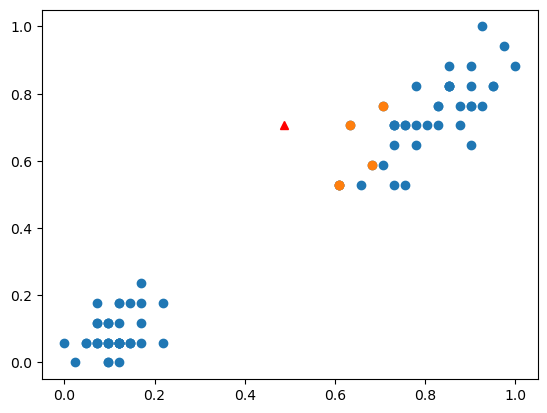

In [91]:
### 시각화
plt.scatter(x_train2_scaled[:,0], x_train2_scaled[:,1]) # 스케일링된 x_train
plt.scatter(k_length2, k_width2)
plt.plot(new_iris2_scaled[0,0], new_iris2_scaled[0,1], 'r^')
plt.show()